In [1]:
from pprint import pprint
from scipy.spatial import geometric_slerp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from numpy import linalg as LA

In [2]:
cifar10_mean = np.array((0.4914, 0.4822, 0.4465))
cifar10_std = np.array((0.2471, 0.2435, 0.2616))

In [3]:
def cosine_similarity(A: np.ndarray, B: np.ndarray):
    # assert A.shape == B.shape
    A_dist = LA.norm(A, 2) if len(A.shape) == 1 else LA.norm(A, 2, axis=1)
    return np.dot(A, B) / (A_dist * LA.norm(B, 2))

- Find 10 mean values in cosine similarity range

In [4]:
# generate 10000 random mean samples
sample_num = 10000
rng: np.random._generator.Generator = np.random.default_rng(seed=123)
rnd_vectors = rng.uniform(-1, 1, size=(sample_num, 3))

In [5]:
# calculate cosine similarity for all mean samples & sort ascending
cossim_values_np = cosine_similarity(rnd_vectors, cifar10_mean)
cossim_value_sort_indices_np = np.argsort(cossim_values_np)
print(cossim_value_sort_indices_np.shape)


(10000,)


In [6]:
# find the left bound & right bound of indices for slicing the values in range
left_limit = -0.454
right_limit = -0.381

left_index = 0
right_index = len(cossim_value_sort_indices_np)
# find left bound
for i in range(cossim_value_sort_indices_np.shape[0]):
    sort_index = cossim_value_sort_indices_np[i]
    left_index = i
    if cossim_values_np[sort_index] > left_limit:
        break
# find right bound
for i in range(cossim_value_sort_indices_np.shape[0]):
    sort_index = cossim_value_sort_indices_np[cossim_value_sort_indices_np.shape[0] - i - 1]
    right_index = cossim_value_sort_indices_np.shape[0] - i - 1
    if cossim_values_np[sort_index] < right_limit:
        break

print(left_index)
print(right_index)


2617
2979


In [7]:
# slice the indices array
sliced_cossim_value_sort_indices_np = cossim_value_sort_indices_np[left_index: right_index + 1]

In [8]:
print(cossim_values_np[sliced_cossim_value_sort_indices_np[0]])

-0.45368882066193555


In [9]:
print(sliced_cossim_value_sort_indices_np.shape)

(363,)


In [10]:
# prepare intermediate 10 points of range
target_cossim_range_np = np.linspace(left_limit, right_limit, 11, endpoint=False)
target_cossim_range = np.round(target_cossim_range_np[1:], 3).tolist()
# target_cossim__index_map = {cossim_value: None for cossim_value in target_cossim_range}
pprint(target_cossim_range)

[-0.447, -0.441, -0.434, -0.427, -0.421, -0.414, -0.408, -0.401, -0.394, -0.388]


In [11]:
# find the nearest 10 cosine similarity points by index
target_counter = 0
selected_sort_indices = []

for sliced_sort_index in sliced_cossim_value_sort_indices_np:
    selected_cossim_value = cossim_values_np[sliced_sort_index]

    if selected_cossim_value > target_cossim_range[target_counter]:
        selected_sort_indices.append(sliced_sort_index)
        target_counter += 1

    if target_counter >= len(target_cossim_range):
        break

pprint(selected_sort_indices)

[928, 8471, 1215, 6326, 9800, 8905, 3986, 7306, 511, 4320]


In [18]:
# round & check the selected mean values
for selected_sort_index in selected_sort_indices:
    selected_vec = np.round(rnd_vectors[selected_sort_index], 3)
    cossim_value = cosine_similarity(selected_vec, cifar10_mean)
    print(f"{selected_vec.tolist()}: {cossim_value}")

[-0.477, 0.49, -0.996]: -0.4466791940969902
[-0.767, -0.475, 0.515]: -0.44109205629763354
[-0.261, -0.614, 0.349]: -0.43456928833639275
[0.369, -0.311, -0.81]: -0.4269176328528797
[-0.574, -0.897, 0.64]: -0.420621522740716
[-0.937, 0.102, 0.19]: -0.41372467349351505
[-0.767, 0.2, 0.033]: -0.40818989442074693
[-0.426, 0.063, 0.079]: -0.39993803022285
[-0.462, -0.85, 0.601]: -0.3943493145315969
[-0.56, 0.306, -0.188]: -0.387563193310409


In [13]:
start_vec = np.array([-0.668, -0.004, 0.165])
end_vec = np.array([-0.631, -0.648, 0.624])

start_unit_vec = start_vec / LA.norm(start_vec, 2)
end_unit_vec = end_vec / LA.norm(end_vec, 2)

t_vals = np.linspace(0, 1, 12)

result = geometric_slerp(start_unit_vec,
                         end_unit_vec,
                         t_vals)

In [14]:
print(LA.norm(start_vec, 2))
print(LA.norm(end_vec, 2))

0.6880879304275
1.0988362025342995


In [15]:
print(start_unit_vec)
print(end_unit_vec)
print(result)

[-0.97080616 -0.00581321  0.23979493]
[-0.57424391 -0.58971483  0.56787354]
[[-0.97080616 -0.00581321  0.23979493]
 [-0.95786354 -0.06511285  0.27974587]
 [-0.93986338 -0.12406868  0.31821973]
 [-0.9169007  -0.18236943  0.35501339]
 [-0.88909675 -0.23970727  0.38993256]
 [-0.85659834 -0.29577944  0.42279287]
 [-0.81957706 -0.35028988  0.45342082]
 [-0.77822839 -0.40295078  0.48165469]
 [-0.73277064 -0.45348409  0.50734541]
 [-0.68344384 -0.50162299  0.53035733]
 [-0.63050843 -0.54711329  0.55056895]
 [-0.57424391 -0.58971483  0.56787354]]


In [16]:
for result_vector in result:
    result_unit_vec = np.round(result_vector, 3)
    cossim_value = cosine_similarity(result_unit_vec, cifar10_mean)
    print(f"{result_unit_vec}: {cossim_value}")

[-0.971 -0.006  0.24 ]: -0.4543046141869655
[-0.958 -0.065  0.28 ]: -0.4594438747968798
[-0.94  -0.124  0.318]: -0.4627244005156938
[-0.917 -0.182  0.355]: -0.46291532306860794
[-0.889 -0.24   0.39 ]: -0.461189891319984
[-0.857 -0.296  0.423]: -0.456756010132767
[-0.82  -0.35   0.453]: -0.450209548384809
[-0.778 -0.403  0.482]: -0.4404437370342617
[-0.733 -0.453  0.507]: -0.4293752192284567
[-0.683 -0.502  0.53 ]: -0.4157410259304859
[-0.631 -0.547  0.551]: -0.3992979273443156
[-0.574 -0.59   0.568]: -0.38133753934506726


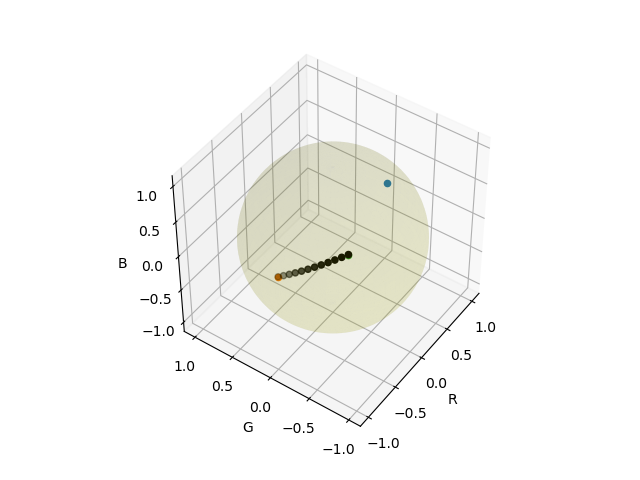

In [17]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='y', alpha=0.1)

# u = np.linspace(0, 2 * np.pi, 100)
# v = np.linspace(0, np.pi, 100)
# x = 1 * np.outer(np.cos(u), np.sin(v))
# y = 1 * np.outer(np.sin(u), np.sin(v))
# z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
# elev = 10.0
# rot = 80.0 / 180 * np.pi
# ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)

r = 1
g = 0
b = 0

ax.scatter(r, g, b)
# ax.scatter(start_vec[0],
#            start_vec[1],
#            start_vec[2],
#            )
ax.scatter(start_unit_vec[0],
           start_unit_vec[1],
           start_unit_vec[2],
           )
# ax.scatter(end_vec[0],
#            end_vec[1],
#            end_vec[2],
#            )
ax.scatter(end_unit_vec[0],
           end_unit_vec[1],
           end_unit_vec[2],
           )

ax.scatter(result[...,0],
        result[...,1],
        result[...,2],
        c='k')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_box_aspect([1, 1, 1])
elev = 45
azim = -145
ax.view_init(elev, azim)
plt.show()
